In [7]:
import nfl_data_py as nfl
from general_utilities import setup_logging
import get_play_by_play_data as pbp
import duckdb_utils as ddu
setup_logging()




In [8]:
# Primary variables
duckdb_file = "/Users/dougstrouth/Documents/Code/datasets/sports/NFL/nfl.duckdb"
schema_pbp = "play_by_play"
schema_aus = "aus_betting"
folder_path_pbp = (
    "/Users/dougstrouth/Documents/Code/datasets/sports/NFL/raw_data/play_by_play"
)
folder_path_aus = (
    "/Users/dougstrouth/Documents/Code/datasets/sports/NFL/nfl_scores_and_betting"
)

Refresh the play by play data

In [9]:
#pbp.main()

Upload all the data into duckdb for play by play

In [10]:
# ddu.create_pbp_from_csvs(duckdb_file, schema_pbp, folder_path_pbp)

already have the csvs from __[Kaggle NFL scores and betting data ](https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data)__ 

uploading these next

In [11]:
# pbp.convert_and_upload_csvs_to_duckdb(duckdb_file, schema_aus, folder_path_aus)

Generate a description of the tables and start to look for linkages
This comes from the duckdb utils and should be project agnostict

In [12]:
# ddu.query_duckdb_metadata(duckdb_file,schema_aus)

,table_schema,table_name,column_name,data_type
0,aus_betting,nfl_stadiums,stadium_name,VARCHAR
1,aus_betting,nfl_stadiums,stadium_location,VARCHAR
2,aus_betting,nfl_stadiums,stadium_open,BIGINT
3,aus_betting,nfl_stadiums,stadium_close,BIGINT
4,aus_betting,nfl_stadiums,stadium_type,VARCHAR
5,aus_betting,nfl_stadiums,stadium_address,VARCHAR
6,aus_betting,nfl_stadiums,stadium_weather_station_zipcode,VARCHAR
7,aus_betting,nfl_stadiums,stadium_weather_type,VARCHAR
8,aus_betting,nfl_stadiums,stadium_capacity,VARCHAR
9,aus_betting,nfl_stadiums,stadium_surface,VARCHAR


In [13]:
# ddu.query_duckdb_metadata(duckdb_file,schema_pbp)

,table_schema,table_name,column_name,data_type
0,play_by_play,depth_charts,season,BIGINT
1,play_by_play,depth_charts,club_code,VARCHAR
2,play_by_play,depth_charts,week,DOUBLE
3,play_by_play,depth_charts,game_type,VARCHAR
4,play_by_play,depth_charts,depth_team,BIGINT
...,...,...,...,...
606,play_by_play,weekly_rosters,entry_year,DOUBLE
607,play_by_play,weekly_rosters,rookie_year,DOUBLE
608,play_by_play,weekly_rosters,draft_club,VARCHAR
609,play_by_play,weekly_rosters,draft_number,BIGINT


In [17]:
import duckdb
import pandas as pd

# Connect to DuckDB
conn = duckdb.connect(duckdb_file)

# Query to get table and column information
query = """
SELECT table_schema, table_name, column_name, data_type
FROM information_schema.columns
"""

# Execute query and load results into a DataFrame
df_columns = conn.execute(query).fetchdf()

# Close the connection
conn.close()

# Display the DataFrame
print(df_columns)

     table_schema      table_name       column_name data_type
0     aus_betting    nfl_stadiums      stadium_name   VARCHAR
1     aus_betting    nfl_stadiums  stadium_location   VARCHAR
2     aus_betting    nfl_stadiums      stadium_open    BIGINT
3     aus_betting    nfl_stadiums     stadium_close    BIGINT
4     aus_betting    nfl_stadiums      stadium_type   VARCHAR
..            ...             ...               ...       ...
647  play_by_play  weekly_rosters        entry_year    DOUBLE
648  play_by_play  weekly_rosters       rookie_year    DOUBLE
649  play_by_play  weekly_rosters        draft_club   VARCHAR
650  play_by_play  weekly_rosters      draft_number    BIGINT
651  play_by_play  weekly_rosters               age    DOUBLE

[652 rows x 4 columns]


In [23]:
schema_map = df_columns.groupby('table_name').apply(lambda x: (x['table_schema'].iloc[0], x['table_name'].iloc[0])).to_dict()

/var/folders/yh/0rpfq6997l56n6_wskf45w2m0000gn/T/ipykernel_30601/906030437.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  schema_map = df_columns.groupby('table_name').apply(lambda x: (x['table_schema'].iloc[0], x['table_name'].iloc[0])).to_dict()


In [18]:
def find_possible_relationships(df):
    # Create a dictionary to hold column relationships
    relationships = {}

    # Group by column name
    for column_name, group in df.groupby('column_name'):
        if len(group) > 1:
            # Find tables with this column
            tables = group['table_name'].tolist()
            data_types = group['data_type'].tolist()

            # Check for compatible data types for possible joins
            compatible = [tables[i] for i in range(len(tables)) if data_types[i] in data_types]

            if len(compatible) > 1:
                relationships[column_name] = compatible

    return relationships

# Find possible relationships
relationships = find_possible_relationships(df_columns)
print(relationships)

{'age': ['seasonal_pfr', 'weekly_rosters'], 'data_point': ['depth_charts', 'ftn_data', 'injuries', 'play_by_play', 'qbr', 'seasonal_pfr', 'weekly_pfr'], 'first_name': ['depth_charts', 'injuries', 'weekly_rosters'], 'football_name': ['depth_charts', 'weekly_rosters'], 'full_name': ['depth_charts', 'injuries'], 'game_id': ['play_by_play', 'weekly_pfr'], 'game_type': ['depth_charts', 'injuries', 'weekly_pfr', 'weekly_rosters'], 'gsis_id': ['depth_charts', 'injuries'], 'jersey_number': ['depth_charts', 'play_by_play', 'weekly_rosters'], 'last_name': ['depth_charts', 'injuries', 'weekly_rosters'], 'nflverse_game_id': ['ftn_data', 'play_by_play'], 'pass': ['play_by_play', 'qbr'], 'penalty': ['play_by_play', 'qbr'], 'pfr_id': ['seasonal_pfr', 'weekly_rosters'], 'player_id': ['qbr', 'weekly_rosters'], 'position': ['depth_charts', 'injuries', 'weekly_rosters'], 's_type': ['seasonal_pfr', 'weekly_pfr'], 'sack': ['play_by_play', 'qbr'], 'season': ['depth_charts', 'ftn_data', 'injuries', 'play_by_

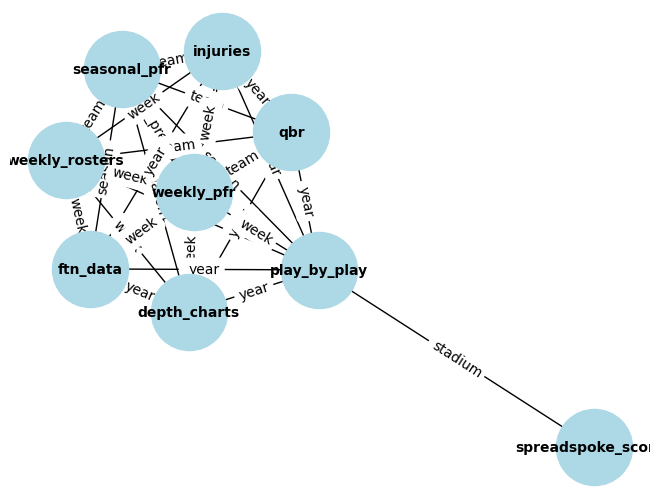

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add nodes and edges based on relationships
for column, tables in relationships.items():
    for i in range(len(tables)):
        for j in range(i + 1, len(tables)):
            G.add_edge(tables[i], tables[j], label=column)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

NameError: name 'generate_primary_key_statements' is not defined